# Resources on Stochastic Gradient Descent

from GFG :

[Stochastic Gradient Descent:](https://www.geeksforgeeks.org/machine-learning/ml-stochastic-gradient-descent-sgd/)

And a Medium article :

[Stochastic Gradient Descent:](https://mohitmishra786687.medium.com/stochastic-gradient-descent-a-basic-explanation-cbddc63f08e0)

# Question 1


How does the learning rate affect the convergence of Stochastic Gradient Descent, and what are some common strategies for choosing or adapting the learning rate during training?


The learning rate in Stochastic Gradient Descent (SGD) determines the size of each parameter update and therefore plays a central role in convergence behavior. If the learning rate is too large, SGD may overshoot the minimum, causing oscillations or even divergence of the loss. If it is too small, the algorithm converges very slowly and may stall near saddle points or shallow minima. A well-chosen learning rate balances speed and stability, allowing rapid progress early in training and smooth convergence later.

Because SGD uses noisy gradient estimates from mini-batches, a single fixed learning rate is often suboptimal. As training progresses, reducing the learning rate helps counteract this noise and enables finer adjustments near the optimum. Common strategies include learning rate decay schedules (such as step decay, exponential decay, or inverse-time decay), which gradually reduce the learning rate over time. Warm-up strategies are also widely used, where the learning rate starts small and increases gradually to avoid unstable updates at the beginning of training.

Adaptive optimization methods, such as AdaGrad, RMSProp, and Adam, automatically adjust the learning rate for each parameter based on past gradients. These methods typically converge faster and require less manual tuning, although they may sometimes generalize worse than carefully tuned SGD. More advanced approaches, such as cyclical learning rates or cosine annealing, intentionally vary the learning rate during training to improve exploration and help escape poor local minima.

In practice, effective SGD training usually combines a reasonable initial learning rate with decay, warm-up, or adaptive methods. Monitoring the loss curve is essential: exploding loss indicates an excessively large learning rate, while very slow improvement suggests a learning rate that is too small.


#  Question 2

`Gradient Descent vs Stochastic Gradient Descent`

Using the same preprocessed dataset from Question 2 from assignment-2'1, do the following:

a) Train a Linear Regression model using Batch Gradient Descent (GD)

b) Train a Linear Regression model using Stochastic Gradient Descent (SGD)

c) Choose suitable values for learning rate and number of epochs.

d) Predict house prices for the test dataset using both models.

e) Evaluate both models using:
Mean Squared Error (MSE) / R² Score

f) Print the evaluation results of GD and SGD in a clear comparison format.

g) Change the learning rate and epochs of the SGD model and observe how the performance changes.

h) Explain why does the SGD path behave so erratically compared to the GD path, and despite this "noise," why might SGD be preferred for very large datasets?

In [1]:
from google.colab import files
files.upload()

Saving Real estate.csv to Real estate.csv


{'Real estate.csv': b'No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area\r\n1,2012.917,32,84.87882,10,24.98298,121.54024,37.9\r\n2,2012.917,19.5,306.5947,9,24.98034,121.53951,42.2\r\n3,2013.583,13.3,561.9845,5,24.98746,121.54391,47.3\r\n4,2013.500,13.3,561.9845,5,24.98746,121.54391,54.8\r\n5,2012.833,5,390.5684,5,24.97937,121.54245,43.1\r\n6,2012.667,7.1,2175.03,3,24.96305,121.51254,32.1\r\n7,2012.667,34.5,623.4731,7,24.97933,121.53642,40.3\r\n8,2013.417,20.3,287.6025,6,24.98042,121.54228,46.7\r\n9,2013.500,31.7,5512.038,1,24.95095,121.48458,18.8\r\n10,2013.417,17.9,1783.18,3,24.96731,121.51486,22.1\r\n11,2013.083,34.8,405.2134,1,24.97349,121.53372,41.4\r\n12,2013.333,6.3,90.45606,9,24.97433,121.5431,58.1\r\n13,2012.917,13,492.2313,5,24.96515,121.53737,39.3\r\n14,2012.667,20.4,2469.645,4,24.96108,121.51046,23.8\r\n15,2013.500,13.2,1164.838,4,24.99156,121.53406,34.3\r\n16,2013.583

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

In [3]:
df = pd.read_csv("Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df = df.drop(columns=[df.columns[0]])
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [12]:
y_train = y_train.values
y_test = y_test.values

In [6]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
class BatchGradientDescentLR:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.w) + self.b

            dw = (-2/n_samples) * np.dot(X.T, (y - y_pred))
            db = (-2/n_samples) * np.sum(y - y_pred)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.w) + self.b

In [8]:
class StochasticGradientDescentLR:
    def __init__(self, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            for i in range(n_samples):
                y_pred = np.dot(X[i], self.w) + self.b
                error = y[i] - y_pred

                self.w += self.lr * error * X[i]
                self.b += self.lr * error

    def predict(self, X):
        return np.dot(X, self.w) + self.b

In [9]:
gd_model = BatchGradientDescentLR(lr=0.01, epochs=2000)
sgd_model = StochasticGradientDescentLR(lr=0.01, epochs=50)

In [13]:
gd_model.fit(X_train_scaled, y_train)
sgd_model.fit(X_train_scaled, y_train)

In [14]:
y_pred_gd = gd_model.predict(X_test_scaled)
y_pred_sgd = sgd_model.predict(X_test_scaled)

In [15]:
mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)

mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

In [16]:
print("Model Comparison")
print("-" * 40)
print(f"Batch Gradient Descent → MSE: {mse_gd:.2f}, R2: {r2_gd:.3f}")
print(f"Stochastic Gradient Descent → MSE: {mse_sgd:.2f}, R2: {r2_sgd:.3f}")

Model Comparison
----------------------------------------
Batch Gradient Descent → MSE: 66.23, R2: 0.582
Stochastic Gradient Descent → MSE: 69.02, R2: 0.565


In [17]:
for lr in [0.1, 0.01, 0.001]:
    for epochs in [20, 50, 100]:
        model = StochasticGradientDescentLR(lr=lr, epochs=epochs)
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, preds)
        r2 = r2_score(y_test, preds)
        print(f"LR={lr}, Epochs={epochs} → MSE={mse:.2f}, R2={r2:.3f}")

LR=0.1, Epochs=20 → MSE=267.48, R2=-0.686
LR=0.1, Epochs=50 → MSE=266.27, R2=-0.679
LR=0.1, Epochs=100 → MSE=266.23, R2=-0.678
LR=0.01, Epochs=20 → MSE=69.27, R2=0.563
LR=0.01, Epochs=50 → MSE=69.02, R2=0.565
LR=0.01, Epochs=100 → MSE=69.58, R2=0.561
LR=0.001, Epochs=20 → MSE=85.90, R2=0.458
LR=0.001, Epochs=50 → MSE=71.08, R2=0.552
LR=0.001, Epochs=100 → MSE=66.87, R2=0.578


Batch Gradient Descent computes gradients using the entire dataset, resulting in:

Smooth loss curves

Stable and deterministic convergence

Stochastic Gradient Descent updates parameters using one sample at a time, which introduces:

High variance in gradient estimates

Noisy, zig-zag optimization paths

Frequent overshooting of the minimum

This randomness makes the SGD path appear erratic and unstable.

Why Is SGD Preferred for Very Large Datasets?

Despite its noise, SGD is often preferred because:

Much faster per update (no need to scan full dataset)

Scales well to millions of samples

Escapes saddle points and shallow local minima

Allows online and streaming learning

Uses less memory

In practice, SGD converges faster in wall-clock time, even if it takes more steps mathematically.

# Question 3

## Decision Trees


### 3.1 Theoretical and Numerical Questions

a) Is a **Decision Tree** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is **entropy** in the context of decision trees?

c) What does **reduction in entropy** signify when a node is split in a decision tree?

d) You are given a dataset consisting of **10 data points**, each having:
- A class label (+ or −)
- A 2D feature vector $(x, y)$

All data points are initially present at the **root node** of a decision tree.

A **decision stump** (depth = 1 decision tree) is to be learned at the root using the **entropy reduction principle**.

**Allowed split questions:**


- ($x \le -2$?)
- ($x \le 2$?)
- ($y \le 2$?)

**Assumptions:**
- All logarithms are **base 2**


- $\log_2 3 = 1.58$
- $\log_2 5 = 2.32$

- Give answers **correct to at least 2 decimal places**

|S.No. | Class | (x, y) |
|----|-------|--------|
| 1  | − | (−3, 0) |
| 2  | + | (3, 3) |
| 3  | + | (1, 1) |
| 4  | + | (1, −1) |
| 5  | + | (−1, 1) |
| 6  | + | (−1, −1) |
| 7  | − | (1, 5) |
| 8  | − | (1, 3) |
| 9  | − | (−1, 5) |
| 10 | − | (−1, 3) |


Answer the following:
1. Compute the **entropy of the root node**
2. Compute the **entropy of the two child nodes** for each allowed split
3. Compute the **reduction in entropy** for each split
4. Identify **which split should be chosen** based on maximum entropy reduction



a) A decision tree is a supervised learning algorithm because it is trained on labeled data, where each input feature vector is associated with a known class label or target value. The tree learns decision rules that best predict these labels.

b) Entropy in decision trees is a measure of impurity or uncertainty in a dataset. It quantifies how mixed the class labels are within a node. A node containing samples from only one class has zero entropy, while a node with evenly mixed classes has maximum entropy.

c) Reduction in entropy, also known as information gain, indicates how much uncertainty is removed when a node is split. A larger reduction means the split produces purer child nodes and is therefore more informative.

d) Numerical Computation

At the root node, all 10 data points are present, with 5 positive and 5 negative samples. The entropy of the root node is:

𝐻
=
−
0.5
log
⁡
2
(
0.5
)
−
0.5
log
⁡
2
(
0.5
)
=
1.00
H=−0.5log
2
	​

(0.5)−0.5log
2
	​

(0.5)=1.00

For the split (x ≤ −2), one negative sample falls to the left child, giving zero entropy, while the right child contains 9 samples (5 positive, 4 negative) with entropy ≈ 0.99. The weighted entropy after the split is 0.89, giving an entropy reduction of 0.11.

For the split (x ≤ 2), both child nodes contain equal numbers of positive and negative samples, each with entropy 1.00. The weighted entropy remains 1.00, resulting in zero entropy reduction.

For the split (y ≤ 2), each child node contains 5 samples with a 4:1 class distribution. The entropy of each child is approximately 0.72. The weighted entropy after the split is therefore 0.72, leading to an entropy reduction of 0.28.

Final Conclusion

Among the allowed splits, (y ≤ 2) achieves the maximum reduction in entropy (0.28) and should therefore be selected as the root split for the decision stump.

### 3.2 Coding Question (Decision Tree using Iris Dataset)

Write a Python program to **train and visualize a Decision Tree classifier** using the **Iris dataset**.

Your code should:
- Load the Iris dataset from `sklearn.datasets`
- Split the data into **70% training** and **30% testing** sets
- Train a Decision Tree classifier
- Plot the learned decision tree with appropriate **feature names** and **class labels**


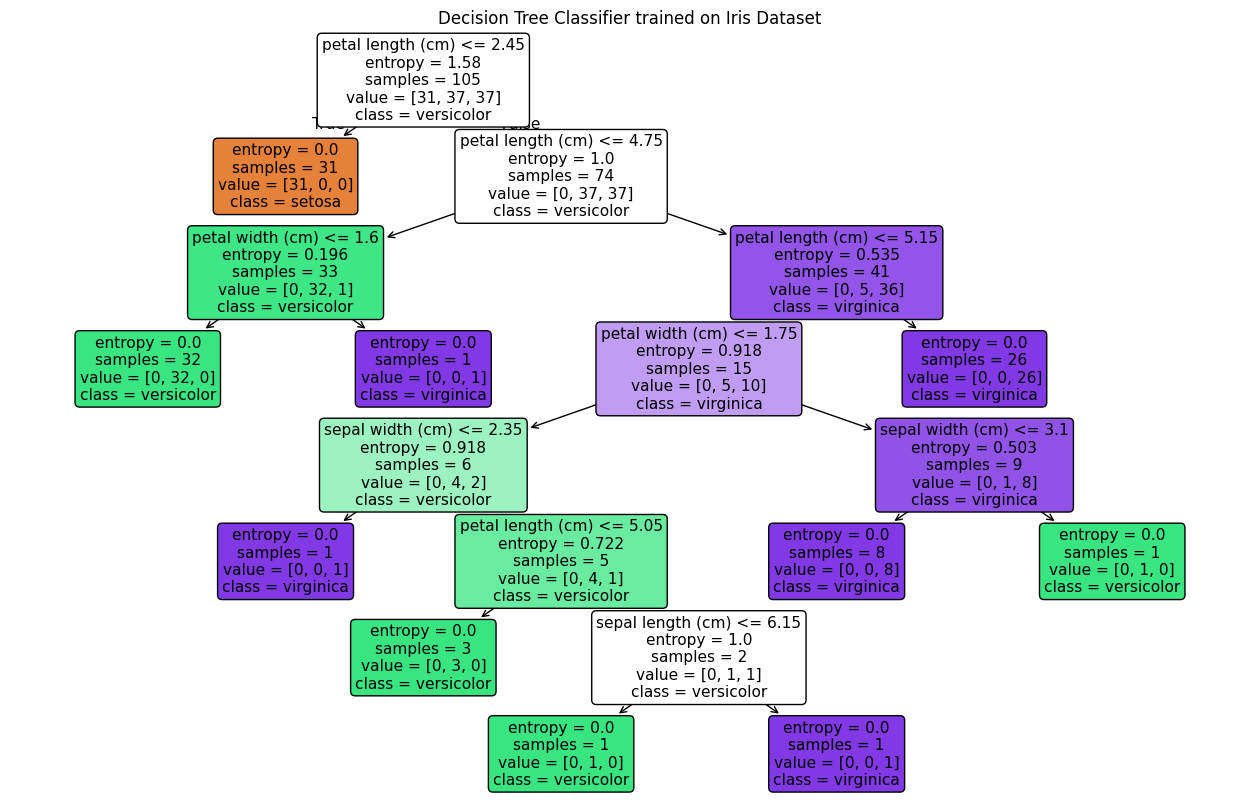

In [18]:
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Train a Decision Tree classifier
dt_model = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_model.fit(X_train, y_train)

# 4. Plot the learned decision tree
plt.figure(figsize=(16, 10))
plot_tree(
    dt_model,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True
)
plt.title("Decision Tree Classifier trained on Iris Dataset")
plt.show()

# Question 4

## Support Vector Machines (SVM)


### 4.1 Theoretical

a) Is a **Support Vector Machine (SVM)** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is a **margin** in SVM?  
Why does SVM aim to maximize the margin?

c) What are **support vectors**?  
Why are they important in defining the decision boundary?

d) What is the purpose of a **kernel function** in SVM?  
Name any two commonly used kernel functions.



a) A Support Vector Machine (SVM) is a supervised learning algorithm because it is trained on labeled data. Each training example includes input features along with a known class label, and the SVM learns a decision boundary that best separates the classes.

b) The margin in SVM is the distance between the decision boundary (hyperplane) and the nearest data points from each class. SVM aims to maximize this margin because a larger margin leads to better generalization, making the classifier more robust to noise and unseen data.

c) Support vectors are the data points that lie closest to the decision boundary. They are important because they completely determine the position and orientation of the hyperplane. Removing or altering non-support-vector points does not affect the decision boundary, while changing a support vector does.

d) The purpose of a kernel function in SVM is to transform data into a higher-dimensional feature space, enabling the model to find a linear separating boundary for data that is not linearly separable in the original space. Two commonly used kernel functions are the linear kernel and the radial basis function (RBF) kernel.

### 4.2 Conceptual

a) In a linearly separable dataset, how does SVM choose the **optimal separating hyperplane**?

b) What happens when the data is **not linearly separable**?  
Briefly explain how SVM handles this situation.

c) What is the role of the **regularization parameter `C`** in SVM?  
What happens when `C` is:
- Very large  
- Very small  

a) In a linearly separable dataset, an SVM chooses the optimal separating hyperplane that maximizes the margin, i.e., the distance between the hyperplane and the closest data points from each class. Among all possible separating hyperplanes, SVM selects the one with the largest margin, which leads to better generalization.

b) When the data is not linearly separable, SVM uses a soft-margin approach. It allows some data points to violate the margin constraints by introducing slack variables, thereby permitting misclassifications. Additionally, by using kernel functions, SVM can map the data into a higher-dimensional space where a linear separation becomes possible.

c) The regularization parameter C controls the trade-off between maximizing the margin and minimizing classification error.

Very large C:
The model heavily penalizes misclassification, leading to a narrow margin that tries to classify all training points correctly. This can cause overfitting and poor generalization.

Very small C:
The model allows more misclassifications, resulting in a wider margin. This usually improves generalization but may lead to underfitting if C is too small.